In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
HepatitisC_raw = pd.read_excel(f"C:\\Users\\김현종\\Desktop\\HCC Project\\DATA\\CHC_kks_0313.xlsx")
HepatitisC_raw.fillna(-1, inplace=True)
HepatitisC_raw

,no,Site,ID,name,Age0,Gender,DM,Fatty_liver,cirrhosis,LSM_ini,...,Albumin48,LSM_FU48,APRI48,FIB448,AMAP48,MPAGEB48,HCC,HCC_time,Death,FU_time
0,2435.0,5,950313630,김기현,48.0,0,0.0,0.0,2.0,28.4,...,4.0,-1.0,1.666667,9.849371,59.531350,12.0,1,366.0,0,743.0
1,-1.0,10,1263102,오종섭,79.0,1,0.0,0.0,1.0,-1.0,...,4.0,-1.0,0.778146,5.242479,70.746189,14.0,1,370.0,0,1943.0
2,2173.0,5,140236064,박영미,75.0,1,0.0,0.0,1.0,-1.0,...,4.6,-1.0,0.440252,3.154556,54.780730,14.0,1,371.0,0,1953.0
3,-1.0,10,1671998,서숙경,82.0,1,0.0,0.0,1.0,-1.0,...,3.1,-1.0,1.772152,13.700567,77.444515,18.0,1,373.0,0,422.0
4,2102.0,5,50649314,이영임,80.0,1,1.0,0.0,1.0,-1.0,...,3.5,-1.0,0.228758,1.852941,59.618170,15.0,1,376.0,0,532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,3611.0,9,12917183,허○성,-1.0,0,0.0,1.0,1.0,-1.0,...,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.0,0,-1.0,0,-1.0
2809,3618.0,9,13050183,이○선,-1.0,1,0.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.0,0,-1.0,0,-1.0
2810,3678.0,9,12447933,코○○○○○이,-1.0,0,0.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.0,0,-1.0,0,-1.0
2811,3727.0,9,13637286,최○○○리,49.0,0,0.0,0.0,1.0,-1.0,...,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.0,0,-1.0,0,63.0


In [3]:
# RANDOM SEED 설정
seed = 26
np.random.seed(seed)

In [4]:
attr_all = HepatitisC_raw.columns
print(attr_all)
HepatitisC_raw = HepatitisC_raw.iloc[np.random.permutation(len(HepatitisC_raw))]

Index(['no', 'Site', 'ID', 'name', 'Age0', 'Gender', 'DM', 'Fatty_liver',
       'cirrhosis', 'LSM_ini', 'Platelet0', 'AST0', 'ALT0', 'Bilirubin0',
       'Albumin0', 'APRI0', 'FIB40', 'AMAP0', 'MPAGEB0', 'Age48', 'Platelet48',
       'AST48', 'ALT48', 'Bilirubin48', 'Albumin48', 'LSM_FU48', 'APRI48',
       'FIB448', 'AMAP48', 'MPAGEB48', 'HCC', 'HCC_time', 'Death', 'FU_time'],
      dtype='object')


In [5]:
attr_pool = ['HCC', 'Age0', 'Age48', 'Platelet0', 'Platelet48', 'AST0', 'AST48', 'ALT0', 'ALT48', 'Bilirubin0', 'Bilirubin48', 'Albumin0', 'Albumin48', 'APRI0', 'APRI48', 'FIB40', 'FIB448', 'AMAP0', 'AMAP48', 'MPAGEB0', 'MPAGEB48']  # Baseline + 1yr

attr = attr_pool

HepatitisC_all = HepatitisC_raw
for at in attr_all:
    
    if not at in attr_pool:
        HepatitisC_all = HepatitisC_all.drop(at,axis=1)

In [6]:
columns = HepatitisC_all.columns

del_rows = []
for irow in range(len(HepatitisC_all)):
    
    missing_counts = 0
    for col in columns[4:]:
        if HepatitisC_all[col][irow] <0:
            missing_counts += 1
        
    if missing_counts>0:
        del_rows.append(irow)
        
del_rows = np.array(del_rows)

HepatitisC = HepatitisC_all.drop(del_rows, axis = 0)

In [7]:
HepatitisC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1984 entries, 2364 to 1456
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age0         1984 non-null   float64
 1   Platelet0    1984 non-null   float64
 2   AST0         1984 non-null   float64
 3   ALT0         1984 non-null   float64
 4   Bilirubin0   1984 non-null   float64
 5   Albumin0     1984 non-null   float64
 6   APRI0        1984 non-null   float64
 7   FIB40        1984 non-null   float64
 8   AMAP0        1984 non-null   float64
 9   MPAGEB0      1984 non-null   float64
 10  Age48        1984 non-null   float64
 11  Platelet48   1984 non-null   float64
 12  AST48        1984 non-null   float64
 13  ALT48        1984 non-null   float64
 14  Bilirubin48  1984 non-null   float64
 15  Albumin48    1984 non-null   float64
 16  APRI48       1984 non-null   float64
 17  FIB448       1984 non-null   float64
 18  AMAP48       1984 non-null   float64
 19  MPAGEB48

In [8]:
HepatitisC

,Age0,Platelet0,AST0,ALT0,Bilirubin0,Albumin0,APRI0,FIB40,AMAP0,MPAGEB0,...,Platelet48,AST48,ALT48,Bilirubin48,Albumin48,APRI48,FIB448,AMAP48,MPAGEB48,HCC
2364,60.0,182.0,48.0,57.0,0.8,4.20,0.659341,2.095963,47.62354,12.0,...,188.0,24.0,15.0,0.9,4.40,0.319149,2.010655,47.17948,12.0,0
1381,78.0,168.0,53.0,34.0,0.5,3.90,0.788690,4.220090,56.27637,15.0,...,178.0,26.0,20.0,0.6,4.40,0.365169,2.580272,54.79095,14.0,0
326,53.0,169.0,43.0,20.0,1.3,4.20,0.636095,3.015384,46.11235,10.0,...,167.0,29.0,32.0,0.5,4.90,0.434132,1.657678,43.82572,10.0,0
1379,61.0,193.0,21.0,17.0,1.7,4.50,0.272021,1.609783,47.15652,12.0,...,230.0,17.0,14.0,1.4,4.60,0.184783,1.224754,44.59990,11.0,0
183,67.0,225.0,50.0,109.0,0.6,3.80,0.555556,1.426097,48.39540,12.0,...,176.0,20.0,15.0,1.0,4.60,0.284091,1.995173,50.37992,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,45.0,305.0,27.0,15.0,1.2,4.10,0.221311,1.028563,33.85700,5.0,...,309.0,22.0,13.0,0.8,4.00,0.177994,0.908344,33.89160,5.0,0
2010,54.0,195.0,69.0,50.0,0.9,4.70,0.884615,2.702236,43.03129,10.0,...,224.0,27.0,27.0,0.8,4.90,0.301339,1.275841,40.81059,9.0,0
1126,49.0,95.0,89.0,32.0,7.4,3.30,2.342105,8.114981,59.63529,14.0,...,164.0,64.0,26.0,2.8,2.60,0.975610,3.826656,56.40278,15.0,0
1985,47.0,174.0,69.0,109.0,1.0,4.87,0.991379,1.785190,47.26266,10.0,...,224.0,13.0,16.0,0.6,4.33,0.145089,0.696429,45.30299,9.0,0


# Data Split (Internal Dataset)

In [61]:
X = HepatitisC.drop('HCC',axis=1)
y = HepatitisC['HCC']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=seed)

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=seed)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 후: ', y_train_over.value_counts())

SMOTE 적용 후:  HCC
1    1299
0    1299
Name: count, dtype: int64


# # Import External Validation Dataset

In [9]:
External_raw = pd.read_excel(f"C:\\Users\\김현종\\Desktop\\HCC Project\\DATA\\External_Validation_0318.xlsx")
External_raw.fillna(-1, inplace=True)
External_raw

,no,Site,ID,name,Age0,Gender,DM,Fatty_liver,cirrhosis,LSM_ini,...,Albumin48,LSM_FU48,APRI48,FIB448,AMAP48,MPAGEB48,HCC,HCC_time,Death,FU_time
0,1,1,8095788,-1.0,48.900000,1,1,-1.0,0.0,8.2,...,2.1,,0.792254,3.381609,65.082410,14.0,0,2237,0,2237
1,2,1,603254,-1.0,79.600000,0,1,-1.0,0.0,-1.0,...,2.4,,1.160000,7.243432,73.385288,18.0,0,1149,0,1149
2,3,1,7784929,-1.0,93.000000,0,1,-1.0,0.0,21.6,...,2.4,27.4,0.267094,2.341913,72.025574,16.0,0,932,0,932
3,4,1,8376770,-1.0,76.300000,0,0,-1.0,0.0,16.6,...,2.6,,0.824742,6.499159,74.530896,19.0,0,1827,0,1827
4,6,1,7525004,-1.0,68.400000,1,0,-1.0,0.0,-1.0,...,3.1,,1.136364,8.623067,79.592614,18.0,0,1488,0,1488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6355,7667,29,214679139,-1.0,53.520548,0,0,-1.0,0.0,5.1,...,5.0,-1,0.225322,1.136967,53.971462,9.0,0,1774,0,1774
6356,7668,29,218696498,-1.0,45.419178,1,0,-1.0,0.0,-1.0,...,5.1,-1,0.360082,0.944236,56.477349,9.0,0,2056,0,2056
6357,7669,29,241393107,-1.0,33.098630,0,0,-1.0,0.0,-1.0,...,5.1,-1,0.261044,0.997685,45.210265,5.0,0,731,0,731
6358,7671,29,221567888,-1.0,51.816438,0,0,-1.0,0.0,-1.0,...,-1.0,-1,-1.000000,-1.000000,-1.000000,-1.0,1,1308,0,1311


In [10]:
External_all = External_raw

for at in attr_all:
    if at not in attr_pool:
        External_all = External_all.drop(at, axis=1)

In [11]:
ext_columns = External_all.columns
del_rows = []

for irow in range(len(External_all)):
    
    missing_counts = 0
    for col in ext_columns[1:]:
        if External_all[col][irow] < 0:
            missing_counts += 1
        
    if missing_counts>0:
        del_rows.append(irow)
        
del_rows = np.array(del_rows)        

External = External_all.drop(del_rows, axis = 0)

In [12]:
External

,Age0,Platelet0,AST0,ALT0,Bilirubin0,Albumin0,APRI0,FIB40,AMAP0,MPAGEB0,...,Platelet48,AST48,ALT48,Bilirubin48,Albumin48,APRI48,FIB448,AMAP48,MPAGEB48,HCC
0,48.900000,237.0,68.0,39.0,0.3,1.7,0.717300,2.246659,58.354719,12.0,...,142.0,45.0,21.0,0.3,2.1,0.792254,3.381609,65.082410,14.0,0
1,79.600000,136.0,55.0,37.0,1.1,3.7,1.011029,5.292197,72.296230,16.0,...,125.0,58.0,26.0,0.7,2.4,1.160000,7.243432,73.385288,18.0,0
2,93.000000,240.0,32.0,19.0,1.0,2.3,0.333333,2.844755,70.996344,16.0,...,234.0,25.0,18.0,1.3,2.4,0.267094,2.341913,72.025574,16.0,0
3,76.300000,112.0,117.0,92.0,1.5,3.2,2.611607,8.309951,73.007622,17.0,...,97.0,32.0,15.0,1.4,2.6,0.824742,6.499159,74.530896,19.0,0
4,68.400000,68.0,49.0,21.0,2.2,3.0,1.801471,10.755575,79.215163,18.0,...,66.0,30.0,13.0,1.9,3.1,1.136364,8.623067,79.592614,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6352,64.460274,248.0,26.0,33.0,0.6,4.5,0.262097,1.176405,63.803214,13.0,...,257.0,24.0,26.0,0.5,5.0,0.233463,1.180548,63.292147,11.0,0
6353,61.758904,115.0,43.0,16.0,4.0,4.4,0.934783,5.773115,67.479667,13.0,...,106.0,34.0,19.0,0.6,5.0,0.801887,4.544602,66.562306,13.0,1
6354,61.010959,124.0,34.0,26.0,0.3,4.2,0.685484,3.280790,64.208866,13.0,...,128.0,20.0,9.0,0.4,5.0,0.390625,3.177654,64.391267,13.0,0
6356,45.419178,197.0,45.0,60.0,0.9,4.8,0.571066,1.339399,59.815943,10.0,...,243.0,35.0,48.0,0.5,5.1,0.360082,0.944236,56.477349,9.0,0


In [18]:
attributes = columns[:-1]
attributes

Index(['Age0', 'Platelet0', 'AST0', 'ALT0', 'Bilirubin0', 'Albumin0', 'APRI0',
       'FIB40', 'AMAP0', 'MPAGEB0', 'Age48', 'Platelet48', 'AST48', 'ALT48',
       'Bilirubin48', 'Albumin48', 'APRI48', 'FIB448', 'AMAP48', 'MPAGEB48'],
      dtype='object')

In [19]:
attr_size = len(attributes)
attr_size

20

# Statistics on Internal Dataset

In [40]:
import math

In [68]:
type_list = ["IN", "EX"]
category_list = ["base", "post"]

In [71]:
def histogram(type, category):  # dataset: Internal(0)/External(1), category: baseline(0)/postyear(1)
    dataset = type_list[type]
    period = category_list[category]
    mean_list, std_list, min_list, max_list = [], [], [], []
    for i in range(10):
        plt.clf()  # Clear the current figure
        if category == 0:
            base_post = attributes[:-10]
        else:
            base_post = attributes[10:]
        attr_name = base_post[i]
        data = HepatitisC[attr_name].to_list()
        mean = np.mean(data)
        std = math.sqrt(np.mean((data-mean)**2))
        minimum = np.min(data)
        maximum = np.max(data)
        mean_list.append(mean), std_list.append(std), min_list.append(minimum), max_list.append(maximum)
        plt.hist(data, bins=30, color='skyblue', edgecolor='black')  # bins: 막대 그래프의 개수
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title(attr_name)
        plt.savefig(f"C:\\Users\\김현종\\Desktop\\HCC_Statistics\\{dataset}\\{period}\\{attr_name}")
    return mean_list, std_list, min_list, max_list

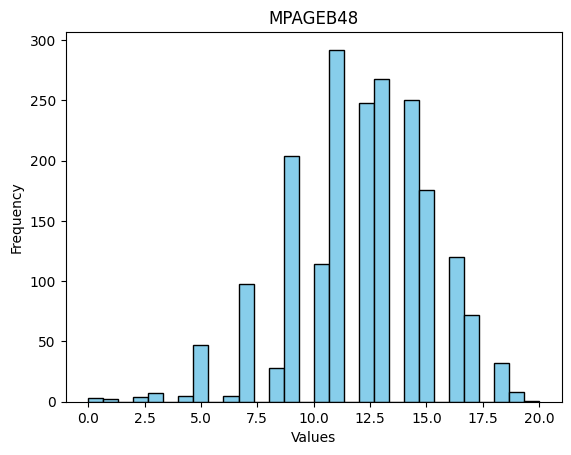

In [73]:
# 전체 Dataset에 대한 Histogram을 plot하고, savefig로 저장
# in_base_mean, in_base_std, in_base_min, in_base_max = histogram(0, 0)
# in_post_mean, in_post_std, in_post_min, in_post_max = histogram(0, 1)
# ex_base_mean, ex_base_std, ex_base_min, ex_base_max = histogram(1, 0)
# ex_post_mean, ex_post_std, ex_post_min, ex_post_max = histogram(1, 1)

In [46]:
# steps = (maximum-minimum)/std
# steps

6.593642733536602

In [81]:
def smote_histogram(smote, base_post):
    mean_list, std_list, min_list, max_list = [], [], [], []
    total_data = X_train if smote == 0 else X_train_over
    fn_smote = "NO_smote" if smote == 0 else "smote"  # fn: filename
    baseline = total_data.columns[:-10]
    postyear = total_data.columns[10:]
    for i in range(10):
        plt.clf()  # Clear the current figure
        if base_post == 'base':
            attr_name = baseline[i]
        else:
            attr_name = postyear[i]
        data = total_data[attr_name].to_list()
        mean = np.mean(data)
        std = math.sqrt(np.mean((data-mean)**2))
        minimum = np.min(data)
        maximum = np.max(data)
        mean_list.append(mean), std_list.append(std), min_list.append(minimum), max_list.append(maximum)
        plt.hist(data, bins=30, color='skyblue', edgecolor='black')  # bins: 막대 그래프의 개수
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title(attr_name)
        plt.savefig(f"C:\\Users\\김현종\\Desktop\\HCC_Statistics\\{fn_smote}\\{base_post}\\{attr_name}")
    return mean_list, std_list, min_list, max_list

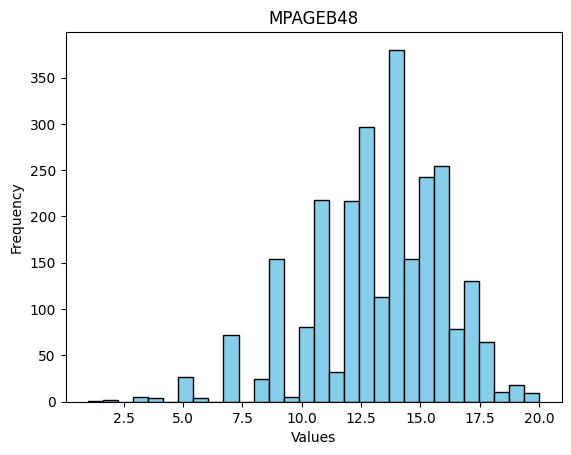

In [82]:
smote_X_base_mean, smote_X_base_std, smote_X_base_min, smote_X_base_max = smote_histogram(0, 'base')
smote_X_post_mean, smote_X_post_std, smote_X_post_min, smote_X_post_max = smote_histogram(0, 'post')
smote_base_mean, smote_base_std, smote_base_min, smote_base_max = smote_histogram(1, 'base')
smote_post_mean, smote_post_std, smote_post_min, smote_post_max = smote_histogram(1, 'post')